In [1]:
from ema_workbench import Model, MultiprocessingEvaluator, Policy, Scenario

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import pairs_plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim

from ema_workbench.analysis import feature_scoring

In [2]:
if __name__ == "__main__":
    model, _ = get_model_for_problem_formulation(4)

    with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=100, policies=3)

100%|████████████████████████████████████████| 300/300 [00:13<00:00, 22.51it/s]


In [19]:
def get_do_nothing_dict():
    return {l.name: 0 for l in model.levers}


policies = [
    #Policy 1:
    #Activates all RfR projects early
    #Minimal dike heightening
    # Moderate early warning: proactive but not alarmist
    # Why it fits Veluwe:
        # Maximum ecological value
        # Slows discharge and improves water retention
        # Avoids heavy infrastructure
    Policy("policy 1- nature_based_low_dikes",**dict(
            get_do_nothing_dict(),
            ** { "1_RfR 0": 1,
    "2_RfR 0": 1,
    "3_RfR 0": 1,
    "4_RfR 0": 1,
    "5_RfR 0": 1,
    "Deventer_DikeIncrease 0": 2,
    "Zutphen_DikeIncrease 0": 1,
    "EWS_DaysToThreat": 3
})),
    #Policy 2:
    #Selective RfR implementation
    #No dike upgrades
    #Strong reliance on early evacuation (4 days notice)
    #Why it fits Veluwe:
        #Low-cost, low-impact strategy
        #Reflects a smart, adaptive mindset
        #Ideal for short-term results and ecological preservatio
    Policy("policy 2- minimalist_smart_response",**dict(
            get_do_nothing_dict(),
            ** {
    "1_RfR 0": 0, "2_RfR 0": 1, "3_RfR 0": 0, "4_RfR 0": 1, "5_RfR 0": 0,
    "Deventer_DikeIncrease 0": 0,
    "Zutphen_DikeIncrease 0": 0,
    "EWS_DaysToThreat": 4
})),
    #Policy 3:
    #Mix of nature-based and structural measures
    # Moderate dike increases in high-risk areas
    # Medium warning time
    #Why it fits Veluwe:
    #Balanced, politically acceptable
    # Useful if full ecological strategy is not feasible
    Policy("policy 3- balanced_hybrid_policy",**dict(
            get_do_nothing_dict(),
            **  {
    "1_RfR 0": 1, "2_RfR 0": 1, "3_RfR 0": 0, "4_RfR 0": 0, "5_RfR 0": 1,
    "Deventer_DikeIncrease 0": 4,
    "Zutphen_DikeIncrease 0": 3,
    "EWS_DaysToThreat": 2
})),
    #Policy 4:
    #Strategic mix of RfR and moderate dike strengthening
    # Flexible and diversified approach
    # Early warning is balanced
    #Why it fits Veluwe:
        # Long-term climate resilience
        # Embraces uncertainty and variability
        # A compromise between robustness and sustainability
     Policy("policy 4- climate_adaptive_policy",**dict(
            get_do_nothing_dict(),
            **  {
    "1_RfR 0": 1, "2_RfR 0": 0, "3_RfR 0": 1, "4_RfR 0": 0, "5_RfR 0": 1,
    "Deventer_DikeIncrease 0": 3,
    "Zutphen_DikeIncrease 0": 5,
    "EWS_DaysToThreat": 3
})),
    #Policy 5 - doesn't fit the veluwe
    #Maximal dike reinforcement
    #No RfR investment
    #Late early warning (reactive strategy)
    #Why it doesn’t fit Veluwe:
        # Hard infrastructure only — no ecological value
        # No focus on water retention or quality
        # Useful for comparison, not as a preferred policy
    Policy("policy 5- defensive_infrastructure_heavy",**dict(
            get_do_nothing_dict(),
            **  {
    "1_RfR 0": 0, "2_RfR 0": 0, "3_RfR 0": 0, "4_RfR 0": 0, "5_RfR 0": 0,
    "Deventer_DikeIncrease 0": 10,
    "Zutphen_DikeIncrease 0": 10,
    "EWS_DaysToThreat": 1
}))
]



In [20]:
n_scenarios = 100
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

100%|████████████████████████████████████████| 500/500 [00:21<00:00, 22.98it/s]


In [21]:
experiments, outcomes = results

df = pd.DataFrame(experiments)

#Add damage per experiment
df["damage_t0"] = outcomes["Expected Annual Damage"][:, 0]
df["damage_t1"] = outcomes["Expected Annual Damage"][:, 1]
df["damage_t2"] = outcomes["Expected Annual Damage"][:, 2]

#Add deaths per experiment
df["deaths_t0"] = outcomes["Expected Number of Deaths"][:, 0]
df["deaths_t1"] = outcomes["Expected Number of Deaths"][:, 1]
df["deaths_t2"] = outcomes["Expected Number of Deaths"][:, 2]

#Add costs per experiment
df["evac_costs_t0"] = outcomes["Expected Evacuation Costs"][:, 0]
df["evac_costs_t1"] = outcomes["Expected Evacuation Costs"][:, 1]
df["evac_costs_t2"] = outcomes["Expected Evacuation Costs"][:, 2]

#
# sns.boxplot(data=df, x="policy", y="damage")
# plt.title("Schade per beleid")
# plt.show()

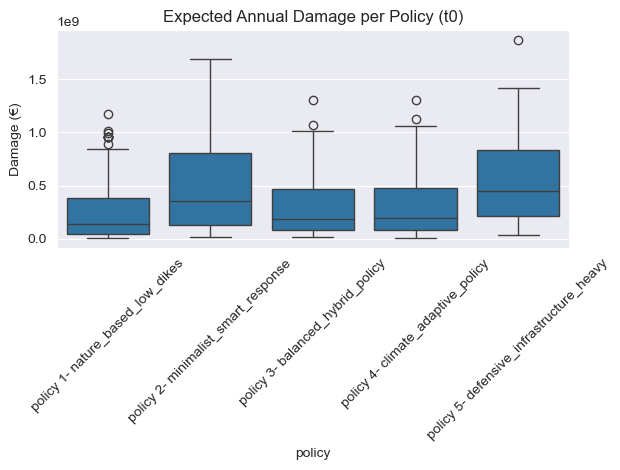

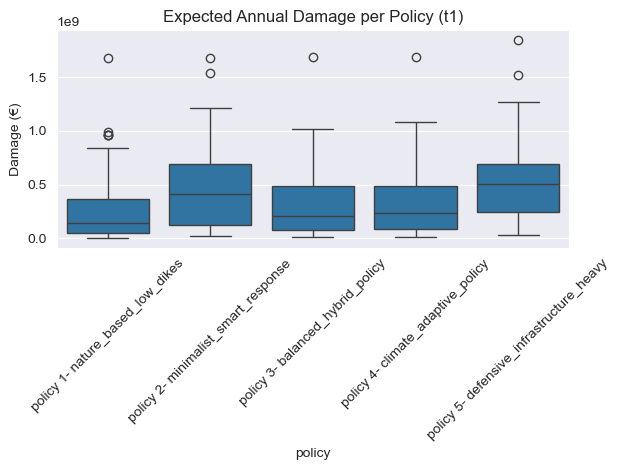

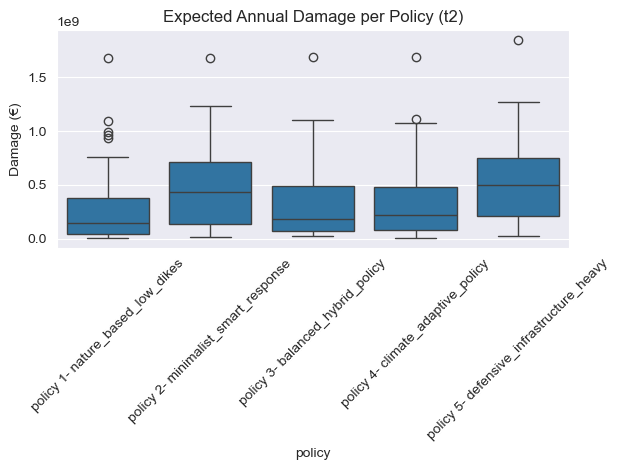

In [22]:
# Plot damage per tijdstap
for t in ["t0", "t1", "t2"]:
    plt.figure()
    sns.boxplot(data=df, x="policy", y=f"damage_{t}")
    plt.title(f"Expected Annual Damage per Policy ({t})")
    plt.ylabel("Damage (€)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/var/folders/b_/nlpf2cxd39n843m6xybwrynh0000gn/T/ipykernel_2901/1737895344.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/b_/nlpf2cxd39n843m6xybwrynh0000gn/T/ipykernel_2901/1737895344.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/b_/nlpf2cxd39n843m6xybwrynh0000gn/T/ipykernel_2901/1737895344.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


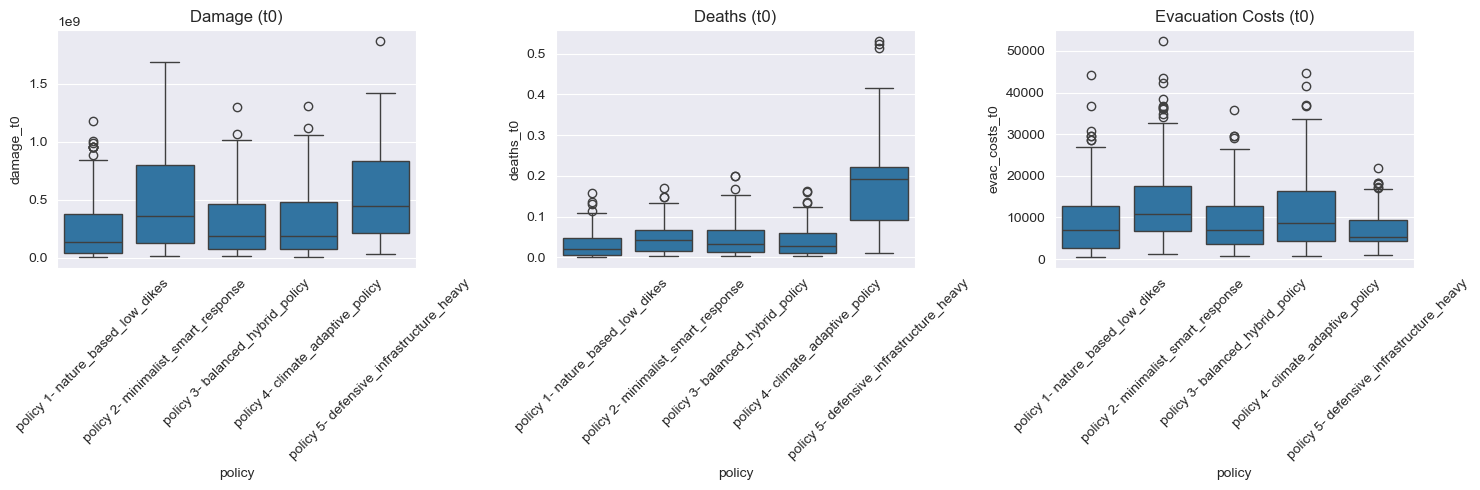

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df, x="policy", y="damage_t0", ax=axes[0])
axes[0].set_title("Damage (t0)")

sns.boxplot(data=df, x="policy", y="deaths_t0", ax=axes[1])
axes[1].set_title("Deaths (t0)")

sns.boxplot(data=df, x="policy", y="evac_costs_t0", ax=axes[2])
axes[2].set_title("Evacuation Costs (t0)")

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

/var/folders/b_/nlpf2cxd39n843m6xybwrynh0000gn/T/ipykernel_2901/404874686.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/b_/nlpf2cxd39n843m6xybwrynh0000gn/T/ipykernel_2901/404874686.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/b_/nlpf2cxd39n843m6xybwrynh0000gn/T/ipykernel_2901/404874686.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


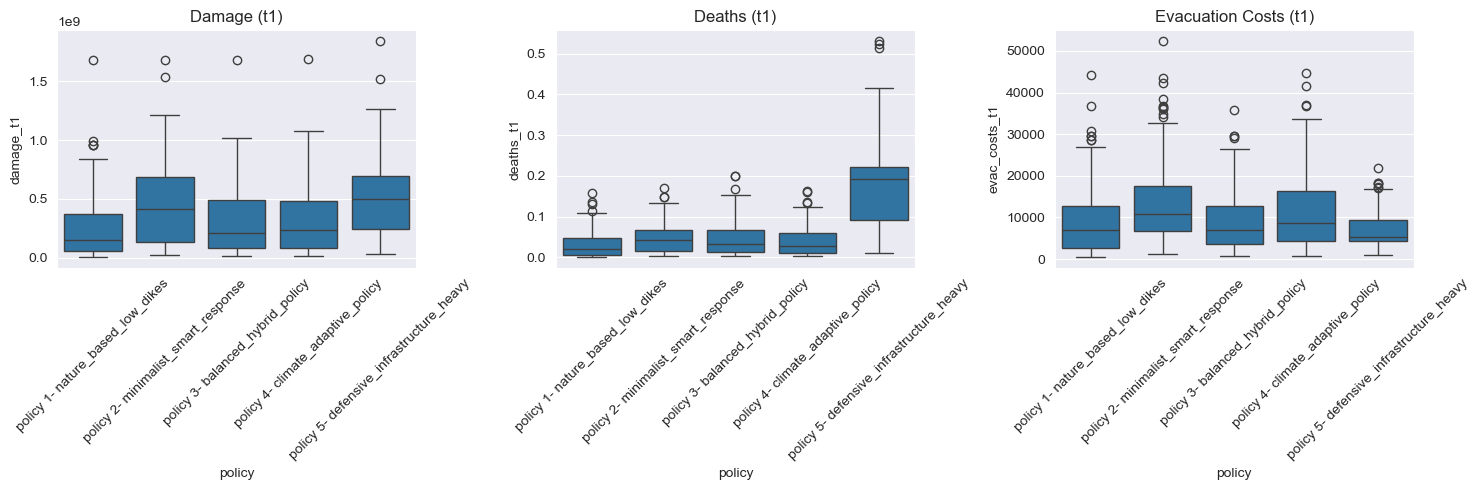

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df, x="policy", y="damage_t1", ax=axes[0])
axes[0].set_title("Damage (t1)")

sns.boxplot(data=df, x="policy", y="deaths_t1", ax=axes[1])
axes[1].set_title("Deaths (t1)")

sns.boxplot(data=df, x="policy", y="evac_costs_t1", ax=axes[2])
axes[2].set_title("Evacuation Costs (t1)")

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

/var/folders/b_/nlpf2cxd39n843m6xybwrynh0000gn/T/ipykernel_2901/1145285576.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/b_/nlpf2cxd39n843m6xybwrynh0000gn/T/ipykernel_2901/1145285576.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/b_/nlpf2cxd39n843m6xybwrynh0000gn/T/ipykernel_2901/1145285576.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


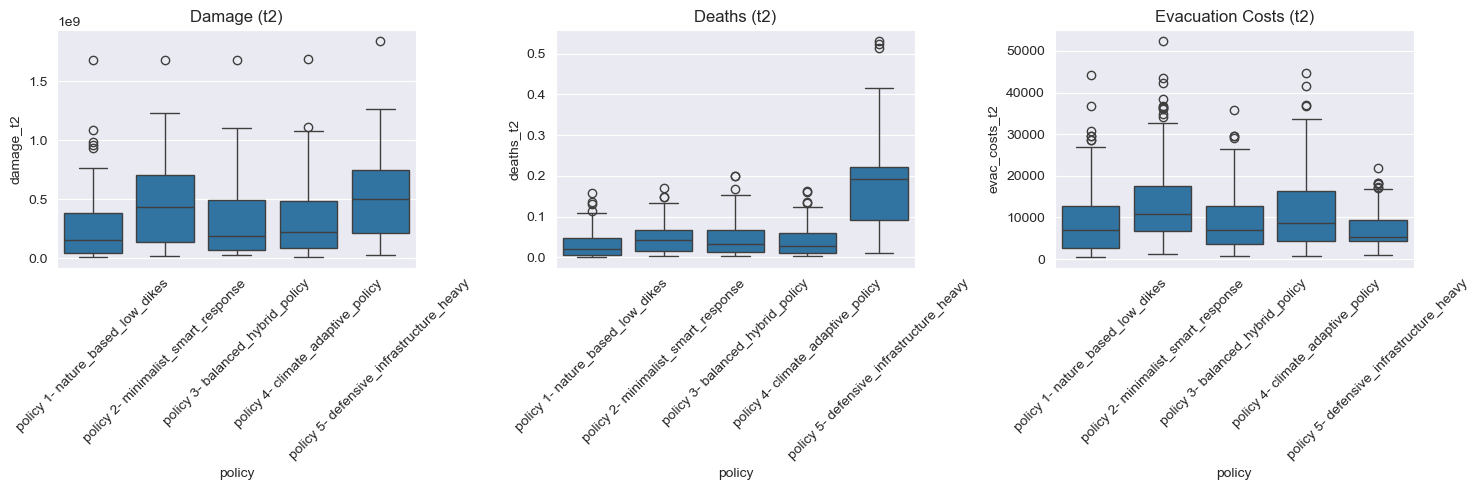

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df, x="policy", y="damage_t2", ax=axes[0])
axes[0].set_title("Damage (t2)")

sns.boxplot(data=df, x="policy", y="deaths_t2", ax=axes[1])
axes[1].set_title("Deaths (t2)")

sns.boxplot(data=df, x="policy", y="evac_costs_t2", ax=axes[2])
axes[2].set_title("Evacuation Costs (t2)")

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()